# Bengaluru House price data

In this notebook we will try to predict the house prices of Houses located in Bengaluru. Bengaluru is a city located in the state of Karnataka, India. It is also known as  the Silicon Valley of India.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,10)

### Loading Data


In [3]:
df1 = pd.read_csv('C:\Users\anami\OneDrive\Desktop\project\model\Bengaluru_House_Data.csv')
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df1.shape

(13320, 9)

Here we have loaded the dataset of Bengaluru House Prices. We can see that it has total of 13320 rows and 9 columns.

In [5]:
df1.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [6]:
df1['area_type'].unique()


array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [7]:
#Viewing the number of unique area_types
df1['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

Some features like area_type, balcony etc. are not needed to make our predictions therefore we will drop them.

In [8]:
#Dropping unnecessary columns
df2 = df1.drop(['area_type' , 'society' , 'balcony' , 'availability'] , axis = 'columns')
df2.shape

(13320, 5)

Now we are left with 5 columns only.

### Data Cleaning

Now we will look into our data for missing values, if there are missing values we will fill them.

In [11]:
#Viewing rows with missing values
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

Here we can see that teh size and bath columns are missing some values. But if we consider 13320 rows of the dataset the number of rows that are missing the values is very small. Therefore, we will drop these rows that are missing values.

In [12]:
#Dropping rows with missing values
df3 = df2.dropna()

In [13]:
#Viewing df3 for missing values
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

Now we can see that there are no missing values in our dataset.

In [14]:
df3.shape

(13246, 5)

Now our our dataset has 13246 rows because we dropped some rows with missing values.

### Feature Engineering

**Size**

In [15]:
# unique values in Size column
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

Here we can see the unique values in the size column. But observe that values like 4 Bedroom and 4BHK are the one and same thing. Therefore we have to solve this problem.

In [16]:
#Creating a new column bhk
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


C:\Users\hp\AppData\Local\Temp\ipykernel_6580\2747665783.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


In [17]:
#Viewing unique values of bhk
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

Now we can see that we only have numbers for each bhk. Here we can see that some houses have a lot of rooms let's see them.

In [18]:
df3[df3['bhk']>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


Here see that the bedroom having 43 rooms have only 2400 sqft of area, which is quite unusual.We will solve this problem.

**total_sqft**

In [19]:
#Viewing unique values in total_sqft column
df3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

Here we can see that some values in total_sqft are like  1133 - 1384 which is not good  we will solve this problem.

In [20]:
# Defining is_float function
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [21]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


Here we can see those total_sqft values that have a range 3067 - 8156 or units with them 34.46Sq. Meter. We don't need these values we just want simply numbers.
The values that have range we will take their average and the values that have units with them, we will drop those values.


In [22]:
#Defining a function to convert the range values
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None
    
    

In [23]:
#Checking convert_sqft_to_num function
convert_sqft_to_num('3067 - 8156')

5611.5

In [24]:
#Applying convert_sqft_to_num
df4 = df3.copy()
df4['total_sqft'] = df4['total_sqft'].apply(convert_sqft_to_num)
df4 = df4[df4.total_sqft.notnull()]


In [25]:
#Checking whether it worked
df4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

Before, row 30 had 	2100 - 2850 total_sqft but now it has 2475.0 which is the average of 2100 and 2850.

**Price Per Square Feet**

In [26]:
#Creating Price Per square Feet Column
df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*100000 / df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


**Location**

In [27]:
#Viewing the number of location datapoints 
df5['location'] = df5['location'].apply(lambda x : x.strip())
location_stats = df5['location'].value_counts(ascending = False)
location_stats

Whitefield                   533
Sarjapur  Road               392
Electronic City              304
Kanakpura Road               264
Thanisandra                  235
                            ... 
Rajanna Layout                 1
Subramanyanagar                1
Lakshmipura Vidyaanyapura      1
Malur Hosur Road               1
Abshot Layout                  1
Name: location, Length: 1287, dtype: int64

We can see that there are locations having 533 data points or even 1 data points. 

Now we will mark the locations that have less than or equal to 10 data points as other.

In [28]:
#Locations having less than or equal to 10 data points
location_stats_less_than_10 = location_stats[location_stats<= 10]
location_stats_less_than_10

BTM 1st Stage                10
Gunjur Palya                 10
Nagappa Reddy Layout         10
Sector 1 HSR Layout          10
Thyagaraja Nagar             10
                             ..
Rajanna Layout                1
Subramanyanagar               1
Lakshmipura Vidyaanyapura     1
Malur Hosur Road              1
Abshot Layout                 1
Name: location, Length: 1047, dtype: int64

In [29]:
#location unique data points
len(df5['location'].unique())

1287

There are 1287 total location data points.

In [30]:
#removing location data points less than or equal to 10
df5['location'] = df5['location'].apply(lambda x : 'other' if x in location_stats_less_than_10 else x)
len(df5['location'].unique())

241

Now  we have only 241 location data points left.

### Outlier Removal

**tatal_sqft / bhk**

we will assume that 1 bhk = 300 sqft. If some values do not satisfy this condition we will remove those rows from our dataset.

In [31]:
#Viewing tatal_sqft / bhk <300
df5[df5['total_sqft'] / df5['bhk'] < 300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [32]:
df5.shape

(13200, 7)

we originally had 13200 rows in our dataset.

In [33]:
#removing outliers 
df6 = df5[~(df5['total_sqft'] / df5['bhk'] < 300)]
df6.shape

(12456, 7)

After removing the outlier we are left with 12456 rows only.

**price_per_sqft**

In [34]:
#Describing price_per_sqft
df6['price_per_sqft'].describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

If we look at the min and max values. The minimum price is 267 only for a sqft which is very unusual for a metro city like Bengalure. The maximum price of 176470 per sqft is also very unusual. We will remove these type of extreme values, by using mean and standard deviation.

In [35]:
#Function for removing extreme values
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key , subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        sd = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft > (m-sd)) & (subdf.price_per_sqft < (m+sd))]
        df_out = pd.concat([df_out , reduced_df] , ignore_index = True)
    return df_out

In [36]:
#Calling remove_pps_outliers 
df7 = remove_pps_outliers(df6)
df7.shape

(10242, 7)

Now our dataset has 10242 rows left, after removing the extreme values.

**BHK's outliers**

If we look carefully in our dataset, we can see that the values of some 2 and 3 bhk houses are very unusual. Like a 2 bhk and a 3 bhk houses are in the same location but their price differs a lot. We will solve this problem.

In [37]:
# Creating a Scatter plot function 
def plot_scatter_chart(df, location):
    bhk2 = df[(df.location == location ) & (df.bhk == 2)]
    bhk3 = df[(df.location == location ) & (df.bhk == 3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft , bhk2.price , color = 'blue' , label = '2 BHK' , s = 50)
    plt.scatter(bhk3.total_sqft , bhk3.price , marker = '+' ,  color = 'green' , label = '3 BHK' , s = 50)
    plt.xlabel('Total Square feet Area')
    plt.ylabel('Price (Lakhs Indian Rupees)')
    plt.title('Location')
    plt.legend()
    
    

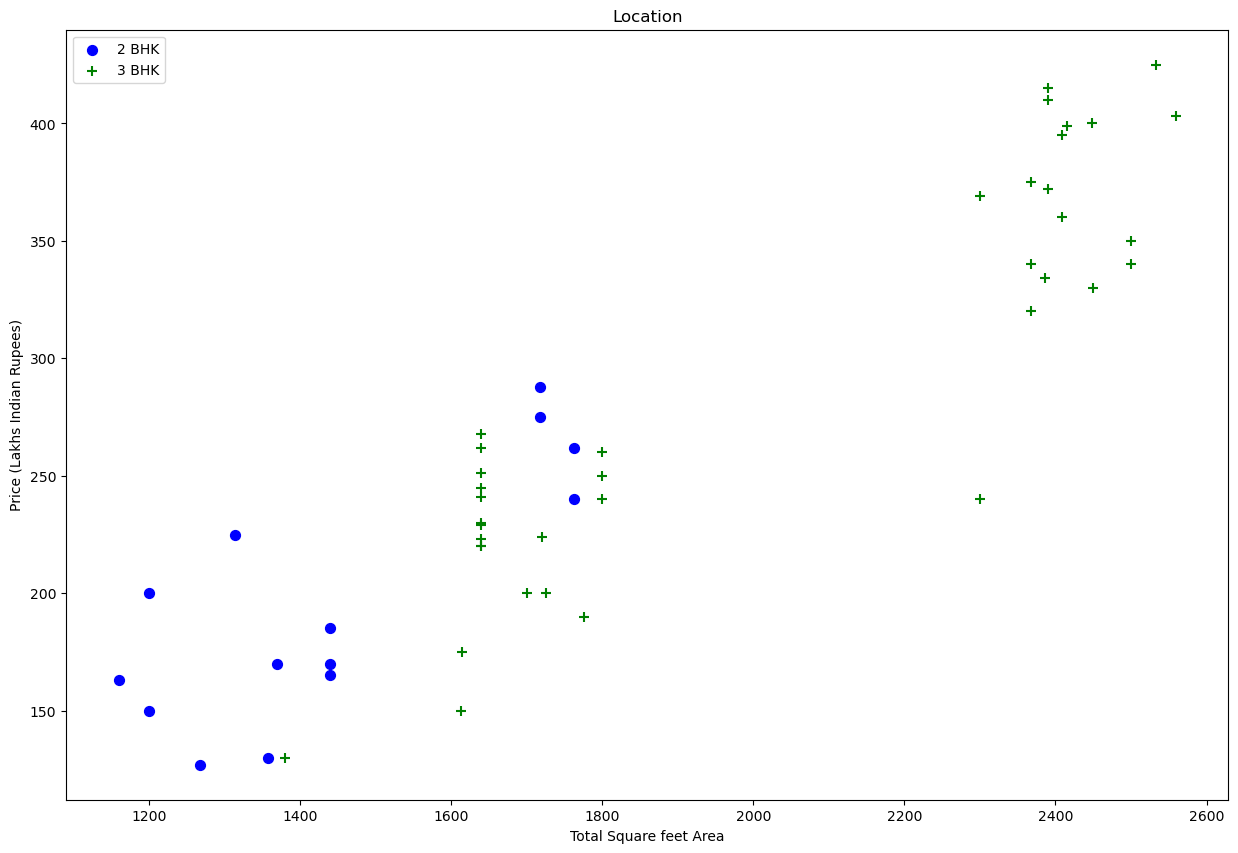

In [38]:
#Calling plot_scatter_chart
plot_scatter_chart(df7 , 'Rajaji Nagar')

In the scatterplot above the blue points are the 2 bhk houses and the green points are the 3 bhk houses. we can see for example around 1700 Total Square feet Area that some 2bhk houses have more price than the 3 bhk houses. we will remove this abnormality.

**We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). What we will do is for a given location, we will build a dictionary of stats per bhk, i.e.**




{

    '1' : {
        'mean': 4000,
        'std: 2000,
        'count': 34
    },
    
    
    
    '2' : {
        'mean': 4300,
        'std: 2300,
        'count': 22
    },    
}



**Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment**

In [39]:
# Creating remove_bhk_outliers
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location , location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk , bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean' : np.mean(bhk_df.price_per_sqft),
                'std' : np.std(bhk_df.price_per_sqft),
                'count' : bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices , bhk_df[bhk_df.price_per_sqft < (stats['mean'])].index.values)
    return df.drop(exclude_indices , axis = 'index')
    

In [40]:
#Calling remove_bhk_outliers
df8 = remove_bhk_outliers(df7)
df8.shape

(7317, 7)

Now let's check if our remove_bhk_outliers function really work.

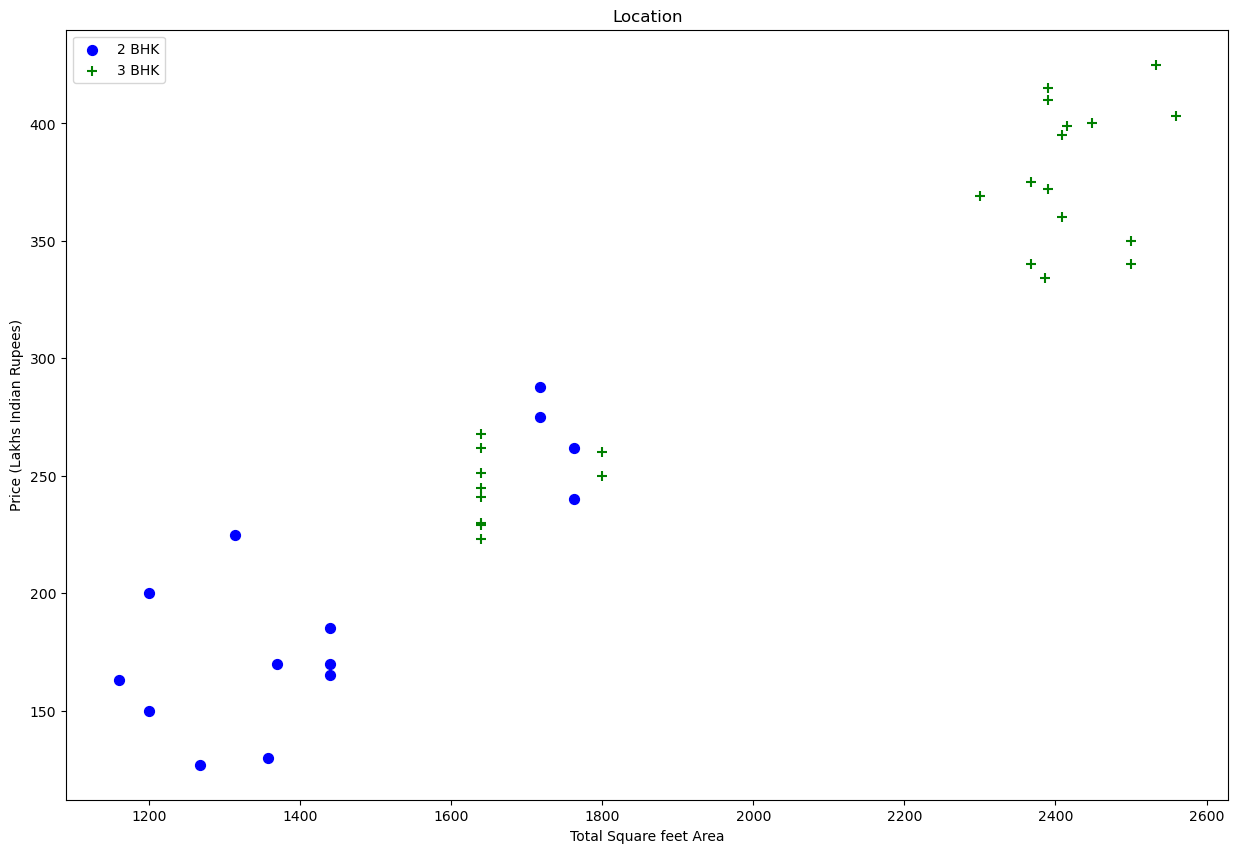

In [41]:
plot_scatter_chart(df8 , 'Rajaji Nagar')

Now we can see that the price of the 2 bhk houses is less than the price of the 3 bhk houses.

Text(0, 0.5, 'Count')

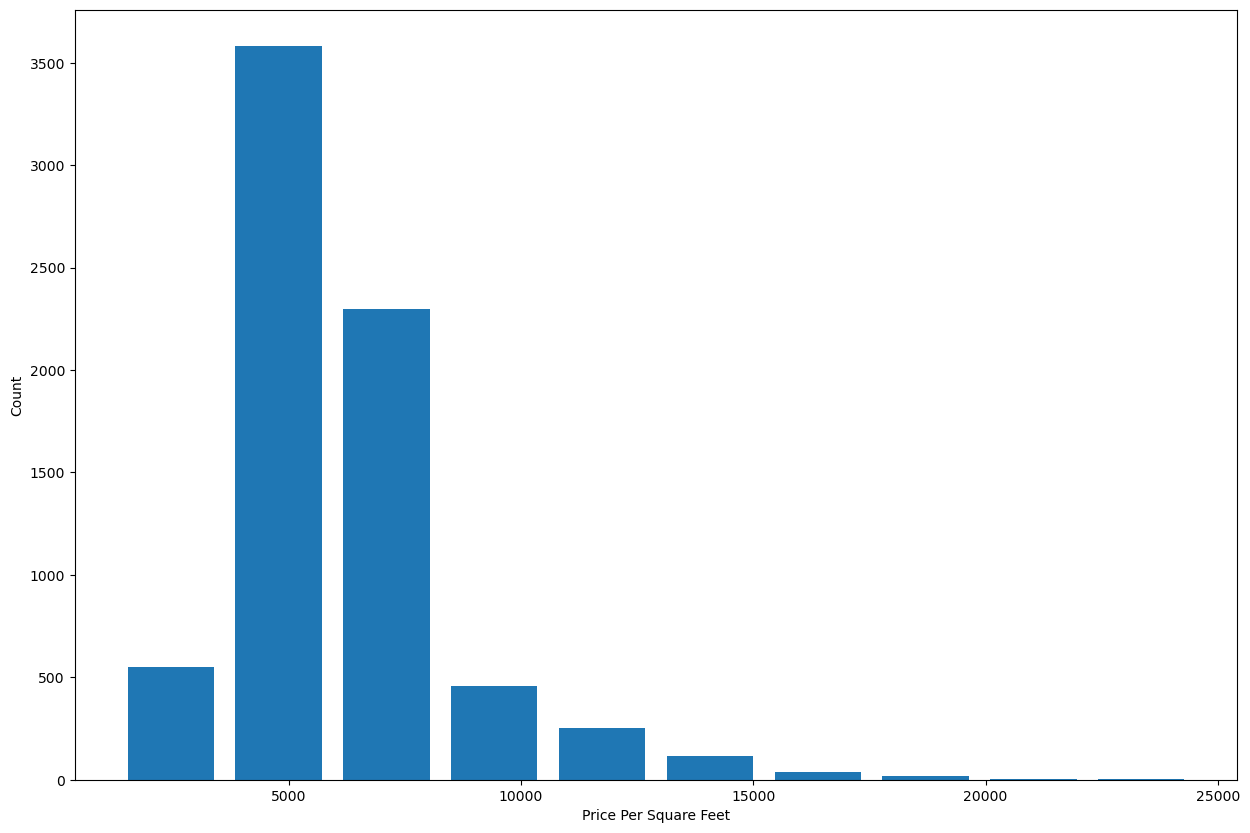

In [42]:
#Plotting a histogram of price_per_sqft
plt.hist(df8.price_per_sqft , rwidth = 0.8)
plt.xlabel('Price Per Square Feet')
plt.ylabel('Count')

We can see from the histogram that our dataset has almost a normal distribution.

**Bathroom**

Text(0, 0.5, 'Count')

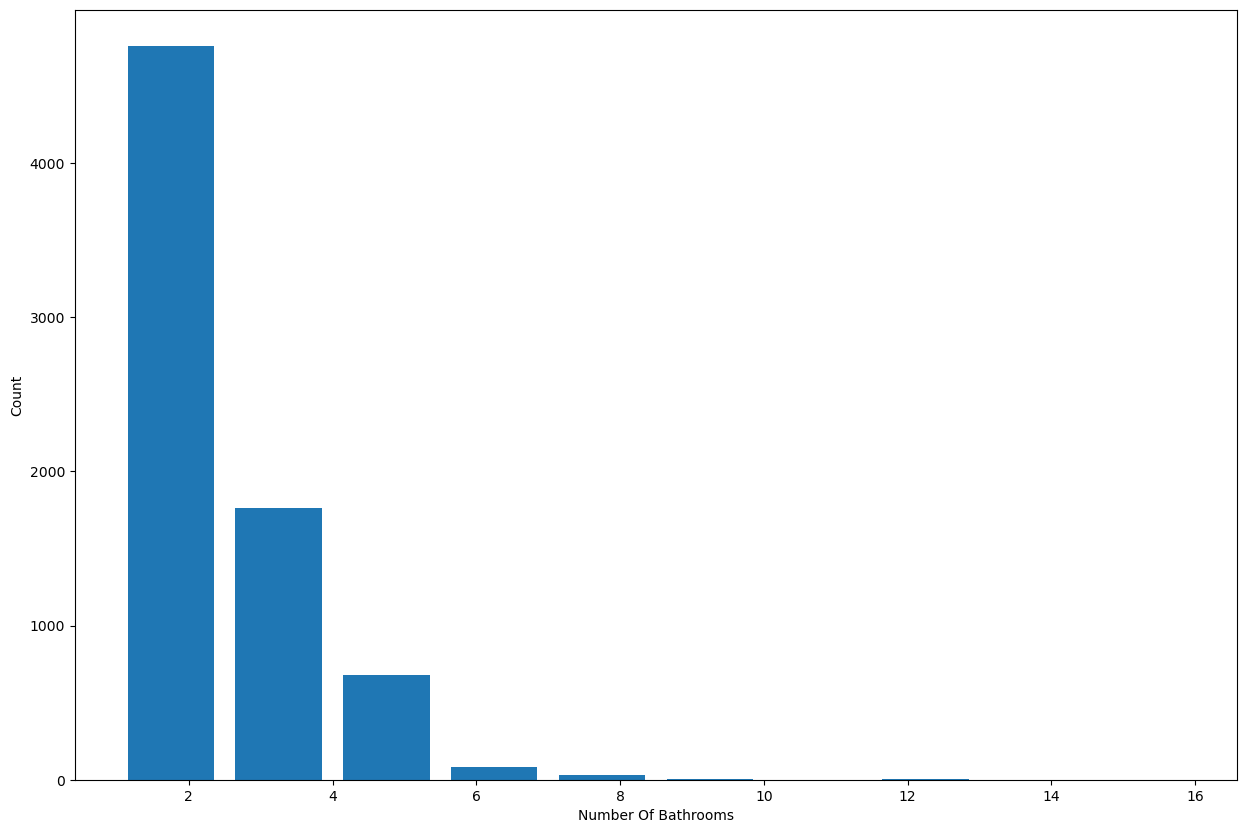

In [43]:
#Plotting a histogram showing bathrooms
plt.hist(df8['bath'] , rwidth = 0.8)
plt.xlabel('Number Of Bathrooms')
plt.ylabel('Count')

We can see that most of the houses in our dataset has 2,4 or 5 bathrooms.

In [44]:
#Viewing unique bathroom values
df8['bath'].unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

we can see that some houses even has 13 or 16 bathrooms.

In [45]:
#Houses having more than 10 bathrooms
df8[df8['bath'] > 10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8483,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8572,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9306,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9637,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Let's suppose that we have a 2bhk house and it has 5 bathrooms, it will be very unusual for a house in Bengaluru. To remove these kind of outliers we will assume a condition that a 1 bhk house can have atmost 3 bathrooms. 

In [46]:
#House not satisfying our condition
df8[df8.bath > (df8.bhk+2)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8408,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


We will keep the hourses that satisfy our condition.

In [47]:
#Removing houses not satisfying our condition
df9 = df8[df8.bath< df8.bhk+2]
df9.shape

(7239, 7)

We can see that our dateset has 7239 rows left.

In our dataset we have a size column , but we have already bhk column. Also the price_per_sqft column was created to remove outliers. Now we have no use of size and price_per_sqft columns, therefore we will drop them.

In [48]:
#Dropping size and price_per_sqft
df10 = df9.drop(['size' , 'price_per_sqft'] , axis = 'columns')
df10.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


### One - Hot Encoding

In our dataset we have location column which is not numeric we know that our machine learning models work on numeric data only.We will convert the data in location column to numeric data using one - hot encoding.

In [49]:
#One- hot encoding
dummies = pd.get_dummies(df10['location'])
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We can see in the above DataFrame that our locations data is in numeric form.

In [50]:
#Combining df10 and dummies
df11 = pd.concat([df10 , dummies.drop('other' , axis = 'columns')] , axis = 'columns')
df11.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
#Dropping location column
df12 = df11.drop('location' , axis = 'columns')
df12.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### train_test_split


Now we will prepare our data to fit in our models.

In [52]:
#Dropping price column
X = df12.drop('price' , axis = 'columns')
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We are dropping the price column because it is a dependent variable. We will train our model using independent variables.

In [53]:
#Making a new DataFrame for price
y = df12.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [54]:
#train_test_split
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 10)

We will train our model using 80% of the DataFrame and will test our model using 20% of the DataFrame.

### Linear Regression

Let's try Linear Regression

In [55]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train , y_train)
lr_clf.score(X_test,y_test)

0.8629132245229442

Our LinearRegression model is giving an accuracy of 86% let's see if it can be improved by using K Fold Cross Validation.

### K Fold Cross Validation

In [56]:
#K - fold cross validation
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits = 5 , test_size = 0.2 , random_state = 0)
cross_val_score(LinearRegression() , X , y , cv = cv)

array([0.82702546, 0.86027005, 0.85322178, 0.8436466 , 0.85481502])

We can see that all our folds - that means our LinearRegression model with data shuffled each time is giving results above 80%. Our score of 86% is not bad enough. 

Now we will try some other Regressors also and see whether they perform better than our LinearRegressor, we will use GridSearchCV for this.

### Finding best model using GridSearchCv

In [64]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit
import pandas as pd
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor


def find_best_model(X, y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False],
                'copy_X': [True, False],
                'n_jobs': [None, 1, 2, 3],
                'positive': [False, True]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])


find_best_model(X, y)


C:\Users\hp\anaconda3\kp\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\hp\anaconda3\kp\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hp\anaconda3\kp\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\hp\anaconda3\kp\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\hp\anaconda3\kp\Lib\site-packages\

,model,best_score,best_params
0,linear_regression,0.847951,"{'copy_X': True, 'fit_intercept': False, 'n_jo..."
1,lasso,0.726788,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.726991,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


Above table shows performances of three regressors - Linear_regression , Lasso and Decision_Tree. we can see from scores that Linear_Regression will be the best choice for our predictions.

### Predictions

It's time to use our model and make predictions.

In [58]:

def predict_price(location , sqft , bath , bhk):
    loc_index = np.where(X.columns == location)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index>= 0:
        x[loc_index] = 1
    return lr_clf.predict([x])[0]

In [59]:
#Calling predict_price
predict_price('2nd Phase Judicial Layout' , 1000 , 2 ,2 )

C:\Users\hp\anaconda3\kp\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


28.477229935375107

In [60]:
#Calling predict_price
predict_price('Indira Nagar' , 1000 , 2 ,2 )

C:\Users\hp\anaconda3\kp\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


193.3119773317996

In [61]:
#Calling predict_price
predict_price('Indira Nagar' , 6000 , 8 ,6 )

C:\Users\hp\anaconda3\kp\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


610.1950678280748

In [62]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)


In [63]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))